# ЗАДАНИЕ ПО ВЫЧМАТАМ
# ВАРИАНТ 7.5. Численное решение жесткой системы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy.interactive import printing
printing.init_printing(use_latex=True)

# Суточные колебания концентрации озона в атмосфере
# Рассмотрим простейшую математическую модель колебаний концентрации озона в атмосфере
# Она описывается следующей неавтономной системой ОДУ

In [95]:
y1 = sp.Symbol('y1')
y2 = sp.Symbol('y2')
y3 = sp.Symbol('y3')
k1 = sp.Symbol('k1')
k2 = sp.Symbol('k2')
k3 = sp.Symbol('k3')
k4 = sp.Symbol('k4')
omega = sp.Symbol('ω')
c3 = sp.Symbol('c3')
c4 = sp.Symbol('c4')
t = sp.Symbol('t')  # Определяем переменные LaTex
dydt_1 = sp.Function('y1')(y1,y2,y3,t)
dydt_2 = sp.Function('y2')(t)
dydt_3 = sp.Function('y3')(y1,y2,y3,t)  # Определяем функции LaTex (уравнения системы)
dydt_1 = dydt_1.diff(t)
dydt_2 = dydt_2.diff(t)
dydt_3 = dydt_3.diff(t)  # вид dy/dt

In [69]:
def kineq(y1, y2, y3, k1, k2, k3, k4):  # функция доступа к уравнениям системы kinetic equation
    dydt_1 = -k1*y1*y2 - k2*y1*y3 + 2*k3*y2 + k4*y3
    dydt_2 = 0
    dydt_3 = k1*y1*y2 - k2*y1*y3 - k4*y3
    return {1:dydt_1, 2: dydt_2, 3:dydt_3}

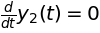

In [66]:
display(sp.Eq(dydt_1, kineq(y1, y2, y3, k1, k2, k3, k4)[1]))
display(sp.Eq(dydt_2, kineq(y1, y2, y3, k1, k2, k3, k4)[2]))
display(sp.Eq(dydt_3, kineq(y1, y2, y3, k1, k2, k3, k4)[3]))

# Определим параметры системы, начальные условия
# Параметры k3, k4 пока покажем оценочно, для представления картины

In [94]:
omega = np.pi/43200  # частота колебаний, c-1
k1, k2 = 1.63e-16, 4.66e-16  # константы скорости
c3, c4 = 22.62, 7.601  # константы дневных колебаний функции exp(-c/sin(wt)), функция определяет зависимость \ 
# k3 и k4 от времени

In [98]:
sp.Eq(omega,np.pi/43200), \
sp.Eq(k1,1.63e-16), \
sp.Eq(k2,4.66e-16), \
sp.Eq(k3,4.66e-16), \
sp.Eq(k4,4.66e-16), \
sp.Eq(c3,22.62), \
sp.Eq(c4,7.601)  # вид

In [99]:
t = np.arange(0, 432, 1)  # step of 1 second
def light_dep(w, c, m):  # m for fit in velocities
    res = np.arange(0)
    for _ in t:
        if np.sin(w*_) <= 0.0:
            continue
        elif round(np.exp(-c/np.sin(w*_))*m):  # not to use ky less than 2 score of k2y1y3
            res = np.append(res, round(np.exp(-c/np.sin(w*_))*10*m, 2))  # exponent >= -10m
    if not res.size>0:
        res = 0  # for the case, when it's darkness all the time
    return res

In [4]:
k3, k4 = light_dep(omega, c3, 1e15), light_dep(omega, c4, 1e11)  # e-16 and e-12 accordingly

In [5]:
y1_0, y2_0, y3_0 = 1e6, 3.7e16, 1e12  # см-3 

# Схема Розенброка CROS
Yn+1 = Yn + tauRek

[E - gamma* h* J]*w = f(x0 + a1*h, y0)

a1 = Rebeta = 1/2

y1 = y0 + h*Rew

Yn+1 = E - (1+j)/2*tau*f(Yn, t)*k = f*(Yn,t + tau/2), a = 1/2

beta = {(1+j)/2, (1-j)/2}
Re(beta) >= 1/2

Функция устойчивости
R(z) = [1+(1-beta)*z]/(1-beta*z) 

R(z) = 1/(1 - z + (z**2)/2)

# Матрица Якоби системы ОДУ в y0

In [7]:
vars = sp.symbols('y1 y2 y3') # Define variables
f = sp.sympify(['-k1*y1*y2 - k2*y1*y3 + 2*k3*y2 + k4*y3', '0', 'k1*y1*y2 - k2*y1*y3 - k4*y3']) # Define function
jacoby = sp.zeros(len(f),len(vars)) # Initialise null Jacobian matrix

In [8]:
# Fill Jacobian matrix with entries
for i, fi in enumerate(f):
     for j, s in enumerate(vars):
            jacoby[i,j] = sp.diff(fi, s)
jacoby

Matrix([
[-k1*y2 - k2*y3, -k1*y1 + 2*k3, -k2*y1 + k4],
[             0,             0,           0],
[ k1*y2 - k2*y3,         k1*y1, -k2*y1 - k4]])

In [9]:
jacobian = sp.Matrix.det(jacoby)  # det == 0
def float_jacoby_filler(y1_0, y2_0, y3_0, k1, k2, k3, k4):
    values = []
    values.append(-k1*y2_0 - k2*y3_0)  #11
    values.append(-k1*y1_0 + 2*k3)  #12
    values.append(-k2*y1_0 + k4)  #13
    values.append(0)  #21
    values.append(0)  #22
    values.append(0)  #23
    values.append(k1*y2_0 - k2*y3_0)  #31
    values.append(k1*y1_0)  #32
    values.append(-k2*y1_0 - k4)  #33
    return values

In [10]:
j = sp.Matrix(3, 3, float_jacoby_filler(y1_0, y2_0, y3_0, k1, k2, k3, k4))  # float, and array sometimes, jacoby specified in y0

# Составим уравнение схемы

In [56]:
gamma = (1+1j)/2
t0 = 0
h = 10
t_end = 172800  # 172800
e = sp.eye(3)  # E matrix
matr = e - gamma*h*j

In [57]:
matr

Matrix([
[ 31.15733 + 30.15733*I,  8.15e-10 + 8.15e-10*I,       2.33e-9 + 2.33e-9*I],
[                     0,                      1,                         0],
[-30.15267 - 30.15267*I, -8.15e-10 - 8.15e-10*I, 1.00000000233 + 2.33e-9*I]])

In [70]:
t = np.linspace(t0, t_end+1, t_end//h)  # h=1, taken h
def rosenbrock(func): 
    def especially_for_row_num(row_num):  # with love
        kost = 0
        row_num = func(omega, c4, t, row_num)
        assert row_num == 1 or 3
        w = np.arange(0)
        if row_num == 1:
            init_y = y1_0
        else:
            init_y = y3_0
        y_n = np.array(init_y)  # final decision Yn+1 = Yn + hRew
        for _ in np.delete(t, 0):
            k3 = float(func(omega, c3, t[kost]))
            k4 = float(func(omega, c4, t[kost]))
            y = kineq(y1_0, y2_0, y3_0, k1, k2 ,k3, k4)[row_num]
            j = sp.Matrix(3, 3, float_jacoby_filler(y1_0, y2_0, y3_0, k1, k2, k3, k4))
            matr = e - gamma*h*j  # m*w = f(h, y0)
            if row_num!=1:
                _m = matr[6] + matr[7] + matr[8]
                # trying to realise matrix division
            else:
                _m = matr[0] + matr[1] + matr[2]
            # w = np.append(w, (y)/_m)
            y_n = np.append(y_n, init_y + h*sp.re(float(y)/_m))  # Yn+1 = Yn + Rew, _ for h
            init_y = init_y + h*sp.re(float(y)/_m)
            kost+=1
        return y_n
    return especially_for_row_num 

In [71]:
@rosenbrock
def light_dep(w, c, t, row_num=None):  # deprecated function from the very beginning
    if not row_num:
        res = np.arange(0)
        if np.sin(w*t) <= 0.0:
            res = 0
        elif round(np.exp(-c/np.sin(w*t)), 18):  
            res = np.append(res, round(np.exp(-c/np.sin(w*t)), 18))  # don't see any sense of more scores 
        if res:
            return res
        else:
            return 0
    else:
        return row_num

In [72]:
y_1 = light_dep(1)
# y_2 = y2_0
y_3 = light_dep(3)

c:\users\константин игоревич\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if __name__ == '__main__':


In [73]:
y_1, y_3

(array([1000000.0, 531.846037277835, -998936.307925444, ...,
        178208607096.393, 178207607628.239, 178206608160.085], dtype=object),
 array([1000000000000.0, 999999000568.485, 999998001136.970, ...,
        1175632785611.69, 1175631786180.18, 1175630786748.66], dtype=object))

In [75]:
def oxygen():
    return y_1
def ozone():
    return y_3

Text(0, 0.5, 'y1(t)')

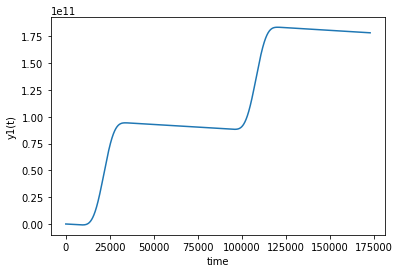

In [78]:
plt.plot(t, oxygen())
plt.xlabel('time')
plt.ylabel('y1(t)')

Text(0, 0.5, 'y3(t)')

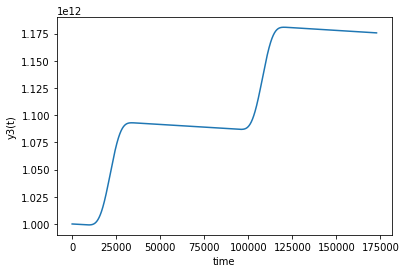

In [79]:
plt.plot(t, ozone())
plt.xlabel('time')
plt.ylabel('y3(t)')

# УЖЕ РУНГА

In [1]:
class Onestepmethod (object):
    def __init__(self, f, y0, t0, te, N, tol):
        self.f = f
        self.y0 = y0.astype(float)
        self.t0 = t0
        self.interval = [t0, te]
        self.grid = linspace(t0, te, N+2)
        self.h = (te-t0)/(N+1)
        self.N = N
        self.tol = tol
        self.m = len(y0)
        self.s = len(self.b)
        self.solution = None

    def step(self):
        ti, yi = self.grid[0], self.y0
        tim1 = ti
        yield np.hstack((array([ti]), yi))
        for ti in self.grid[1:]:
            yi = yi + self.h * self.phi(tim1, yi)
            tim1 = ti
            yield np.hstack((array([ti]), yi))

    def solve(self):
        self.solution = list(self.step())

    # To be implemented in a derived class
    def phi(self, tim1, yi):
        return 1

In [2]:
class RungeImplicit(Onestepmethod):
    def phi(self, t0, y0):
        M = 10
        stageDer = array(self.s*[self.f(t0,y0)])
        J = jacobian(self.f, t0, y0)
        stageVal = self.phi_solve(t0, y0, stageDer, J, M)
        return array([dot(self.b, stageVal.reshape(self.s,self.m)[:, j]) for j in range(self.m)])

    def phi_solve(self, t0, y0, initVal, J, M):
        JJ = eye(self.s*self.m)-self.h*np.kron(self.A, J)
        luFactor = linalg.lu_factor(JJ)
        for i in range(M):
            initVal, norm_d = self.phi_newtonstep(t0, y0, initVal, luFactor)
            if norm_d < self.tol:
                # print('Newton converged in {} steps'.format(i))
                break
            elif i == M-1:
                raise ValueError('The Newton iteration did not converge.')
        return initVal

    def phi_newtonstep(self, t0, y0, initVal, luFactor):
        d = linalg.lu_solve(luFactor, - self.F(initVal.flatten(), t0, y0))
        return initVal.flatten() + d, norm(d)

    def F(self, stageDer, t0, y0):
        stageDer_new = empty((self.s, self.m))
        for i in range(self.s):
            stageVal = y0 + array([self.h * dot(self.A[i, :],
                                  stageDer.reshape(self.s, self.m)[:, j]) for j in range(self.m)])
            stageDer_new[i, :] = self.f(t0 + self.c[i] * self.h, stageVal)
        return stageDer - stageDer_new.reshape(-1)

In [11]:
class Ordinate:
    def __init__(self, y1=y1_0, y2=y2_0, y3=y3_0):
        self.y1 = y1
        self.y2 = y2
        self.y3 = y3
    def __str__(self):
        return set(y1, y2, y3)

    
y = Ordinate()

In [45]:
t = np.linspace(0, 100, 201)
print(t[1])
def test(y ,t):
    dydt = 0.3*np.cos(y)
    return dydt
y0 = 1/2
y = odeint(test, y0, t)
#plt.plot(t, y)
#plt.show()
#y_1 = odeint(kineq, y1_0, t, axis=2)
#y_3 = odeint(kineq, y3_0, t, axis=2)

0.5
